### 7-3．深層学習のためのデータ準備
#### 全記事の分かち書き

In [1]:
# Janomeのインストール
!pip install janome

In [1]:
import os
import re
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSKeepFilter

# 記事フォルダの指定
dirs = ['it-life-hack', 'movie-enter']

# 単語とラベルを格納するリストを生成
tmp = []
wakati = [] # 説明変数
label = [] # 目的変数

# 分かち書きオブジェクト生成
#t = Tokenizer(wakati=True)

# 形態素解析の準備
# オブジェクト生成
t = Tokenizer()
# 名詞の単語のみ抽出するフィルターを生成
token_filters = [POSKeepFilter(['名詞'])]
# フィルターを搭載した解析フレームワークの生成
a = Analyzer([], t, token_filters)

# 各フォルダのファイルを1つずつ読み込んで表示
for i, d in enumerate(dirs):
    # ファイルの取得
    files = os.listdir('./data/' + d)
    
    for file in files:
        # ファイルオープンと読み込み
        f = open('./data/' + d + '/' + file, 'r', encoding='utf-8')
        text = f.read()
        
        # 正規表現で不要な文字列を除去して表示
        reg_text = re.sub(r'[0-9a-zA-Z]+', '', text)
        reg_text = re.sub(r'[:;/+\.-]', '', reg_text)
        reg_text = re.sub(r'[\s\n]', '', reg_text)
        
        # 分かち書きして単語をリストへ格納
        #wakati.append(t.tokenize(reg_text))
        for token in a.analyze(reg_text):
            tmp.append(token.surface)
        wakati.append(tmp)
        tmp = []
        
        # 記事ごとにラベルの格納
        label.append(i)
        
        # ファイルクローズ
        f.close()

In [3]:
# リストのサイズ確認
print(len(wakati))
# 1つ目の記事の単語を確認
print(wakati[0])
# 1つ目の記事のラベルを確認
print(label[0])

400
['旧式', '禁断', 'パワーアップ', '最新', 'ソフト', '一挙', 'チェック', 'フラッシュ', 'バック', 'テレビ', '連携', 'パソコン', 'プロセッサ', 'パソコン', 'パソコン', '次', '次', '登場', '旧式', '禁断', 'パワーアップ', '方法', '最新', '話題', 'セキュリティ', 'ソフト', '一挙', '紹介', 'インテル', '装着', '旧式', 'どれ', '高速', '化', 'の', '(', '上', ')', 'インテル', '最新', 'シリーズ', '発売', '現行', '中', 'トップクラス', '性能', '製品', '旧型', '高速', '化', 'ポイント', 'レビュー', '風変わり', 'レビュー', '程度', '効果', '期待', '大', '使用', '(', 'インテル', ')', 'ハイブリッド', 'これ', '初期', '費用', '更新', '費用', 'とも', '無料', 'ジャストシステム', 'ヤモリ', '目印', 'セキュリティ', 'ソフト', '現在', '多く', 'ユーザー', 'パソコン', 'セキュリティ', 'ソフト', '導入', '過半数', '毎年', ',', '円', '程度', '更新', '費用', '手続き', '不満', '有料', 'ソフト', '利用', 'ユーザー', '割', '無料', 'セキュリティ', 'ソフト', '性能', '面', 'の', '不安', '導入', '状況', 'テレビ', '方', '提案', '春', '連携', '年月日', '個人', '向け', 'デスク', 'トップ', 'パソコン', 'シリーズ', 'タイプ', 'モデル', '月日', '販売', '発表', '商品', 'パワフル', '録画', '機能', '視聴', '録画', '機能', '業界', '人気', 'の', '連携', 'つぶやき', 'プラス', '追加', 'パソコン', 'ならでは', '機能', '搭載', 'スマート', 'フォン', 'ホーム', 'ネットワーク', '対応', '強化', '安心', '簡単', '快適', 'デジタル', '

#### 単語の数値化

In [4]:
import itertools
from collections import Counter
import pandas as pd

# 単語の出現数をカウント
word_freq = Counter(itertools.chain(* wakati))

# 単語を出現数降順で並べ替え
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語数を確認
print(len(dic))
# 出現数の多い単語を5つ確認
print(pd.DataFrame(dic).head())

11539
    0
0  こと
1   の
2  映画
3   人
4  よう


In [5]:
# 単語にIDを付与し辞書を作成
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})
    
# 辞書の長さを確認
print(len(dic_inv))

11539


In [6]:
# 練習問題4
# 単語をIDへ変換
wakati_id = [ [ dic_inv[word] for word in waka ] for waka in wakati ]

# リストのサイズ確認
print(len(wakati_id))
# 1つ目の記事の単語IDを確認
print(wakati_id[0])

400
[1456, 1751, 2228, 97, 232, 2045, 152, 1752, 1077, 155, 768, 90, 1882, 90, 90, 255, 255, 29, 1456, 1751, 2228, 141, 97, 77, 200, 232, 2045, 75, 212, 246, 1456, 566, 219, 42, 2, 92, 79, 164, 212, 97, 35, 37, 2712, 11, 5130, 282, 23, 1753, 219, 42, 567, 403, 6850, 403, 513, 458, 348, 2229, 158, 92, 212, 164, 1228, 30, 1144, 3055, 1457, 3055, 2448, 225, 6851, 6852, 5131, 200, 232, 184, 266, 86, 90, 200, 232, 885, 5132, 4153, 185, 47, 513, 1457, 3055, 5133, 3056, 1363, 232, 67, 86, 1078, 225, 200, 232, 282, 679, 2, 1544, 885, 315, 155, 106, 1277, 1145, 768, 62, 680, 231, 589, 316, 90, 35, 447, 95, 13, 298, 122, 472, 5134, 1458, 33, 395, 1458, 33, 1642, 110, 2, 768, 699, 2713, 490, 90, 1883, 33, 54, 80, 126, 1545, 568, 27, 974, 1022, 167, 186, 114, 1229, 1277, 1364, 95, 324, 974, 1884, 609, 431, 432, 145, 609, 13, 37, 609, 431, 13, 795, 2449, 1643, 3532, 796, 404, 90, 609, 431, 23, 194, 5, 1885, 721, 650, 650, 3057, 342, 370, 1885, 191, 127]


In [8]:
# Kerasのインストール
!pip install keras

    100% |████████████████████████████████| 317kB 5.9MB/s 
    100% |████████████████████████████████| 51kB 5.6MB/s 


In [7]:
from keras.preprocessing import sequence
import numpy as np

# 可変長から固定長へ変換
wakati_id = sequence.pad_sequences(np.array(wakati_id), maxlen=399, padding="post", truncating="post")

# labelをNumpy配列へ変換
label = np.array(label)

# 1つ目の記事の単語IDを確認
print(wakati_id[0])

Using TensorFlow backend.


[1456 1751 2228   97  232 2045  152 1752 1077  155  768   90 1882   90
   90  255  255   29 1456 1751 2228  141   97   77  200  232 2045   75
  212  246 1456  566  219   42    2   92   79  164  212   97   35   37
 2712   11 5130  282   23 1753  219   42  567  403 6850  403  513  458
  348 2229  158   92  212  164 1228   30 1144 3055 1457 3055 2448  225
 6851 6852 5131  200  232  184  266   86   90  200  232  885 5132 4153
  185   47  513 1457 3055 5133 3056 1363  232   67   86 1078  225  200
  232  282  679    2 1544  885  315  155  106 1277 1145  768   62  680
  231  589  316   90   35  447   95   13  298  122  472 5134 1458   33
  395 1458   33 1642  110    2  768  699 2713  490   90 1883   33   54
   80  126 1545  568   27  974 1022  167  186  114 1229 1277 1364   95
  324  974 1884  609  431  432  145  609   13   37  609  431   13  795
 2449 1643 3532  796  404   90  609  431   23  194    5 1885  721  650
  650 3057  342  370 1885  191  127    0    0    0    0    0    0    0
    0 

##### === モデル作成はここから ======================

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
# 
model.add(Embedding(11540, 512, input_length=399))
# 
model.add(LSTM(128, dropout=0.5))
# 
model.add(Dense(1, activation='sigmoid'))

# 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 399, 512)          5908480   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,236,801
Trainable params: 6,236,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 学習条件の設定　誤差関数＝2値の交差エントロピー、最適化手法＝Adam法、測定方法＝モデル精度
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習の実行
hist = model.fit(wakati_id, label, batch_size=32, verbose=1, 
                 epochs=30, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/30
320/320 [==============================] - 15s 47ms/step - loss: 0.6753 - acc: 0.6219 - val_loss: 1.0010 - val_acc: 0.0250
Epoch 2/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6490 - acc: 0.6937 - val_loss: 0.8826 - val_acc: 0.1125
Epoch 3/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6452 - acc: 0.7031 - val_loss: 1.0383 - val_acc: 0.1250
Epoch 4/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6364 - acc: 0.7031 - val_loss: 1.0383 - val_acc: 0.1750
Epoch 5/30
320/320 [==============================] - 11s 35ms/step - loss: 0.6266 - acc: 0.7031 - val_loss: 1.0311 - val_acc: 0.1750
Epoch 6/30
320/320 [==============================] - 12s 39ms/step - loss: 0.6143 - acc: 0.7031 - val_loss: 1.0000 - val_acc: 0.2000
Epoch 7/30
320/320 [==============================] - 15s 48ms/step - loss: 0.5996 - acc: 0.7000 - val_loss: 0.8992 - val_acc: 0.2250
Epoch 8/30
320/32

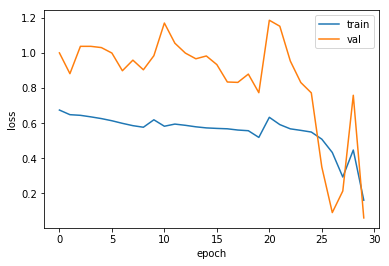

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# 訓練データとテストデータの誤差の履歴を描画
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

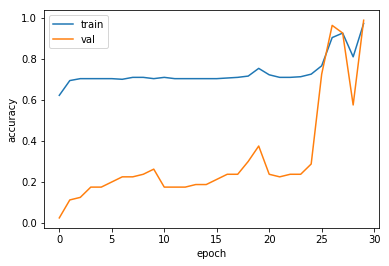

In [11]:
# 訓練データとテストデータの精度の履歴を描画
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === モデル作成はここまで ======================